##Taller 2


Ciencia de datos aplicada

Maestría en Ingeniería de la informacíon

Estudiante: Juan Carlos Tovar Orjuela

In [2]:
# Visualización de las primeras filas del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ajuste la ruta del archivo si es necesario
df = pd.read_csv('apartamentos.csv')
df.head()

,_id,codigo,tipo_propiedad,tipo_operacion,precio_venta,area,habitaciones,banos,administracion,parqueaderos,...,vigilancia,coords_modified,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,is_cerca_estacion_tm,parque_cercano,distancia_parque_m,is_cerca_parque
0,66d86c7eceda690e85508760,4133491,APARTAMENTO,VENTA,339000000.0,76.0,3,2,300000.0,1,...,0.0,False,SUBA,URB. PICADELLY,Toberin - Foundever,1142.45,0.0,PARQUE VECINAL DESARROLLO CANTALEJO URBANIZACI...,426.09,1.0
1,66d86c7eceda690e85508761,3889852,APARTAMENTO,VENTA,223000000.0,63.0,3,2,NaN,0,...,0.0,False,USAQUEN,BARRANCAS PERLAS DEL NORTE,Mazurén,2384.89,0.0,PARQUE ZONAL ALTA BLANCA,472.47,1.0
2,66d86c7eceda690e85508762,4386770,APARTAMENTO,VENTA,440898168.0,54.0,3,2,305000.0,0,...,0.0,False,LOS MARTIRES,SAN VICTORINO,De La Sabana,232.22,1.0,PARQUE METROPOLITANO TERCER MILENIO,961.29,0.0
3,66d86c7eceda690e85508763,4210060,APARTAMENTO,VENTA,158000000.0,43.0,2,2,106600.0,0,...,0.0,False,SUBA,LA ESTRELLA II,Portal Suba,2275.08,0.0,PARQUE ZONAL LA GAITANA,539.98,0.0
4,66d86c7eceda690e85508764,4063762,APARTAMENTO,VENTA,222800000.0,48.0,3,2,151000.0,0,...,0.0,False,USAQUEN,HORIZONTES USAQUEN,Terminal,2099.16,0.0,PARQUE VECINAL DESARROLLO VERBENAL I,1661.14,0.0


In [3]:
# Información básica del dataset
print('Dimensiones del dataset (filas, columnas):', df.shape)
print('\nTipos de datos:')
print(df.dtypes)
print('\nValores nulos por columna:')
print(df.isnull().sum())
print('\nEstadísticas descriptivas:')
print(df.describe())

Dimensiones del dataset (filas, columnas): (10691, 46)

Tipos de datos:
_id                         object
codigo                      object
tipo_propiedad              object
tipo_operacion              object
precio_venta               float64
area                       float64
habitaciones                 int64
banos                        int64
administracion             float64
parqueaderos                 int64
sector                      object
estrato                    float64
antiguedad                  object
latitud                    float64
longitud                   float64
direccion                   object
descripcion                 object
website                     object
last_view                   object
datetime                    object
url                         object
timeline                    object
estado                      object
compañia                    object
precio_arriendo            float64
jacuzzi                    float64
piso              

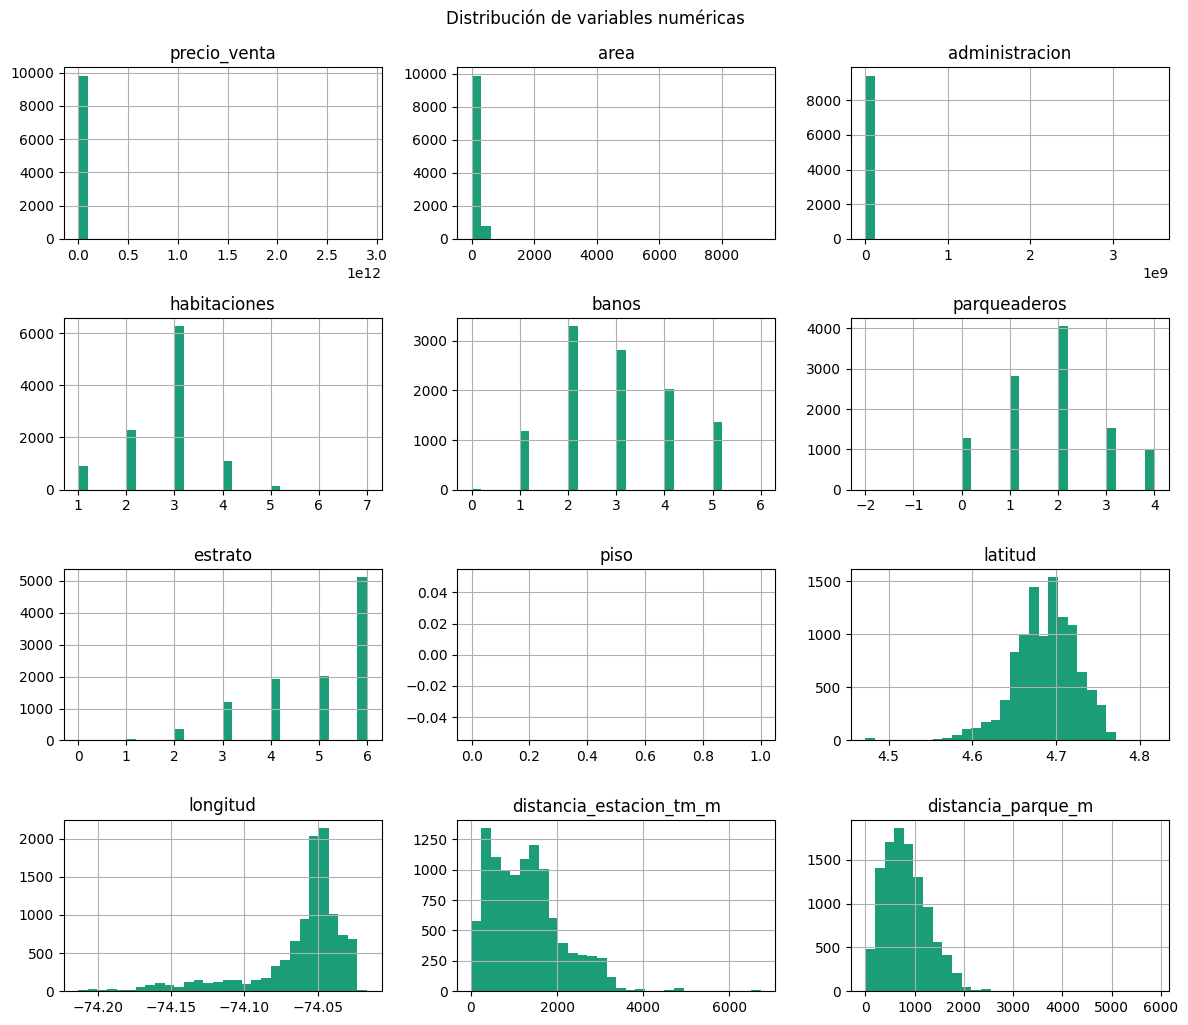

In [4]:

columnas_numericas_inmo = [
    'precio_venta', 'area', 'administracion',
    'habitaciones', 'banos', 'parqueaderos', 'estrato', 'piso',
    'latitud', 'longitud',
    'distancia_estacion_tm_m', 'distancia_parque_m'
]
df[columnas_numericas_inmo].hist(bins=30, figsize=(12,10), color='#1b9e77')
plt.tight_layout()
plt.suptitle('Distribución de variables numéricas', y=1.02)
plt.show()

/tmp/ipython-input-2833902362.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='estrato', data=df, palette='viridis')


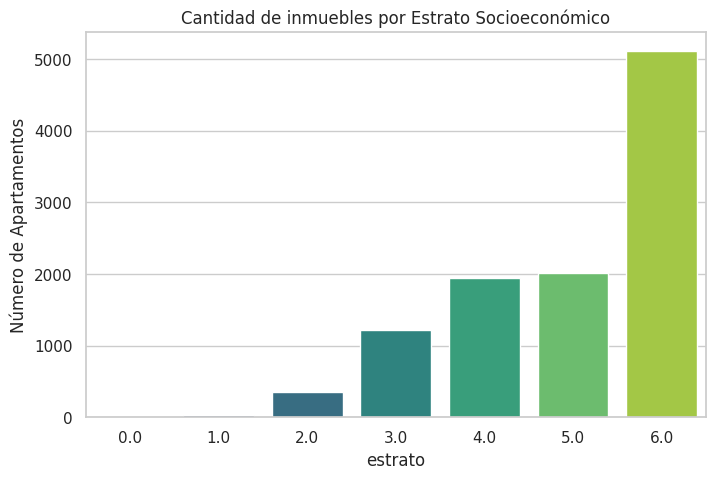

/tmp/ipython-input-2833902362.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='localidad', data=df,


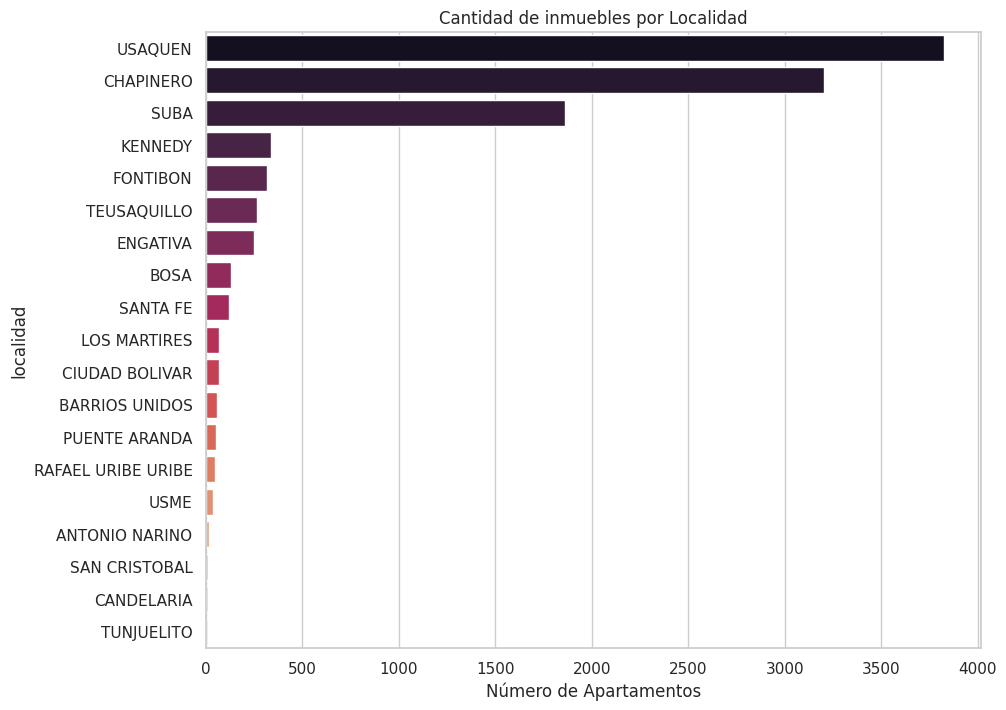

In [5]:
# Configuración visual simple
sns.set_theme(style="whitegrid")

# --- GRÁFICA 1: Conteo por ESTRATO ---
plt.figure(figsize=(8, 5))
sns.countplot(x='estrato', data=df, palette='viridis')
plt.title('Cantidad de inmuebles por Estrato Socioeconómico')
plt.ylabel('Número de Apartamentos')
plt.show()

# --- GRÁFICA 2: Conteo por LOCALIDAD ---
plt.figure(figsize=(10, 8))
sns.countplot(y='localidad', data=df,
              order=df['localidad'].value_counts().index,
              palette='rocket')
plt.title('Cantidad de inmuebles por Localidad')
plt.xlabel('Número de Apartamentos')
plt.show()

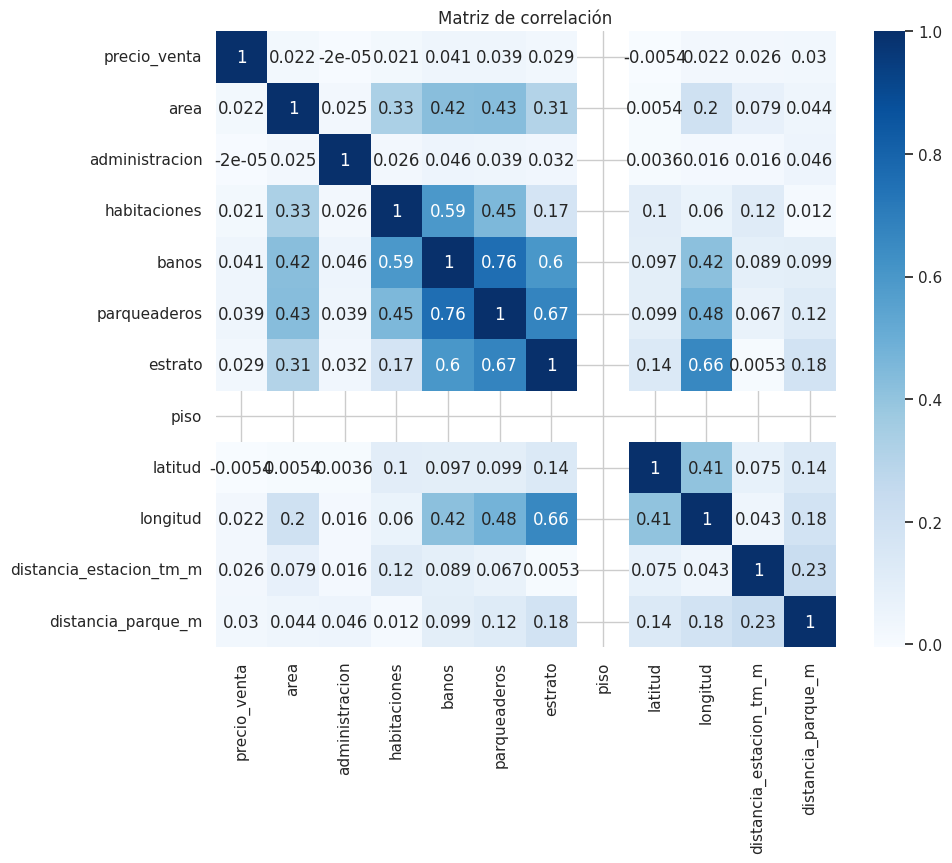

In [6]:
# Matriz de correlación de variables numéricas
import numpy as np
correlation = df[columnas_numericas_inmo].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='Blues')
plt.title('Matriz de correlación')
plt.show()

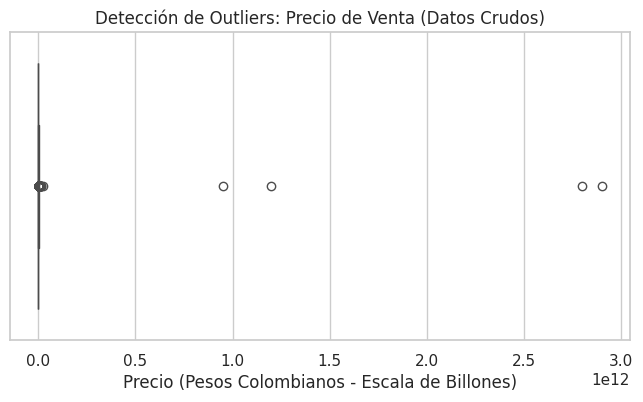

In [7]:
# Boxplot del PRECIO DE VENTA para identificar valores atípicos
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='precio_venta')
plt.title('Detección de Outliers: Precio de Venta (Datos Crudos)')
plt.xlabel('Precio (Pesos Colombianos - Escala de Billones)')
plt.show()

# 3. Limpieza y procesamiento de datos

Esta sección tiene como finalidad asegurar la calidad y consistencia del conjunto de datos antes de realizar análisis más detallados.

Ahora realice los siguientes procedimientos:

1. Identifique y gestione valores nulos o perdidos.
2. Verifique y elimine registros duplicados.
3. Revise los formatos de las variables categóricas y numéricas.
4. Analice y gestione valores atípicos (outliers) en la variable 'area' utilizando la técnica de capado (“caps/winsorización”), limitando los valores extremos a un percentil especificado.
5. Documente cualquier decisión o cambio realizado sobre los datos que pueda afectar los análisis posteriores.

--- INICIO DEL PROCESO DE LIMPIEZA MULTIVARIADO ---
Filas antes de borrar nulos críticos: 10691
Filas después de borrar nulos en precio y área: 9836
Nulos en administración rellenados temporalmente con la mediana.

Valores nulos por columna (después del manejo preliminar):
_id                           0
codigo                        0
tipo_propiedad                0
tipo_operacion                0
precio_venta                  0
area                          0
habitaciones                  0
banos                         0
administracion                0
parqueaderos                  0
sector                      212
estrato                       1
antiguedad                    4
latitud                       0
longitud                      0
direccion                  9360
descripcion                   0
website                       0
last_view                     0
datetime                      0
url                        9360
timeline                   1456
estado                

/tmp/ipython-input-138480223.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio['administracion'].fillna(mediana_admin, inplace=True)



Estadísticas descriptivas ORIGINALES de 'precio_venta':
count             9836.000000
mean        1925366120.105022
std        43466317141.168602
min            1100000.000000
25%          422000000.000000
50%          760000000.000000
75%         1400000000.000000
max      2900000000000.000000
Name: precio_venta, dtype: object

Estadísticas descriptivas DESPUÉS del capado en 'precio_venta_capped':
count          9836.000000
mean     1112146545.932595
std      1036938624.687002
min       127000000.000000
25%       422000000.000000
50%       760000000.000000
75%      1400000000.000000
max      5600000000.000000
Name: precio_venta_capped, dtype: object

PROCESANDO VARIABLE: AREA
 -> Límite inferior (1%): 27
 -> Límite superior (99%): 470

Estadísticas descriptivas ORIGINALES de 'area':
count    9836.000000
mean      146.902951
std       178.253149
min         0.000000
25%        70.000000
50%       118.000000
75%       190.000000
max      9242.000000
Name: area, dtype: object

Estadísti

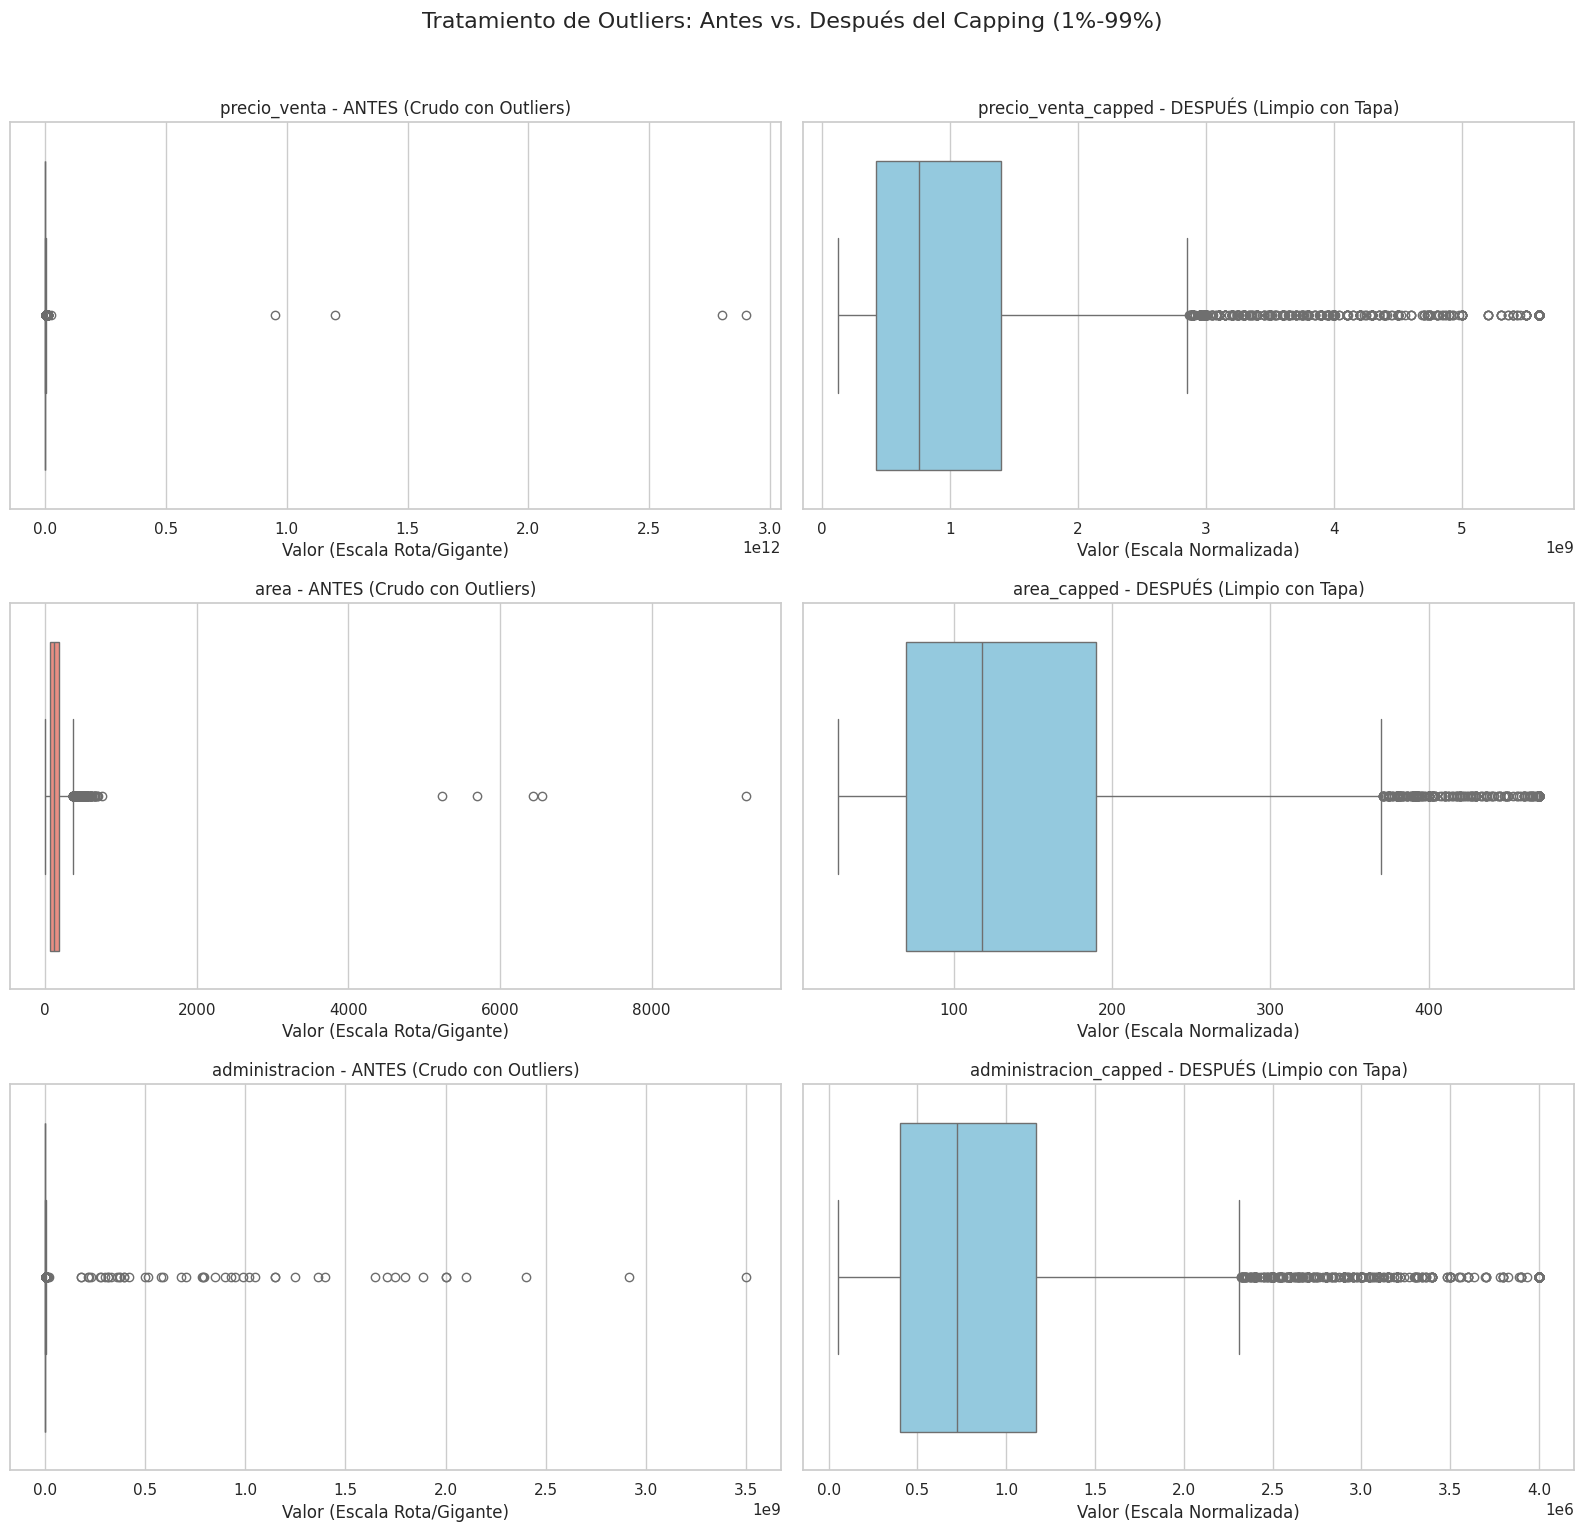


--- ¡PROCESO DE LIMPIEZA TERMINADO! ---
Ahora usa las columnas terminadas en '_capped' para tus análisis.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


df_limpio = df.copy()

print("--- INICIO DEL PROCESO DE LIMPIEZA MULTIVARIADO ---")

print(f"Filas antes de borrar nulos críticos: {len(df_limpio)}")
df_limpio.dropna(subset=['precio_venta', 'area'], inplace=True)
print(f"Filas después de borrar nulos en precio y área: {len(df_limpio)}")


mediana_admin = df_limpio['administracion'].median()
df_limpio['administracion'].fillna(mediana_admin, inplace=True)
print("Nulos en administración rellenados temporalmente con la mediana.")


print('\nValores nulos por columna (después del manejo preliminar):')
print(df_limpio.isnull().sum())

# 2. Eliminación de registros duplicados
duplicados = df_limpio.duplicated().sum()
print(f'\nNúmero de filas duplicadas eliminadas: {duplicados}')
df_limpio = df_limpio.drop_duplicates()


variables_outliers = ['precio_venta', 'area', 'administracion']

# Preparamos el lienzo para los gráficos (3 filas, 2 columnas)
fig, axes = plt.subplots(3, 2, figsize=(16, 15))
fig.suptitle('Tratamiento de Outliers: Antes vs. Después del Capping (1%-99%)', fontsize=16, y=1.02)


for i, col in enumerate(variables_outliers):
    print(f"\n{'='*40}")
    print(f"PROCESANDO VARIABLE: {col.upper()}")
    print(f"{'='*40}")

    # --- A. Calcular los límites (caps) ---
    # Usamos el percentil 1 y 99 como en tu ejemplo
    lower_cap = df_limpio[col].quantile(0.01)
    upper_cap = df_limpio[col].quantile(0.99)
    print(f" -> Límite inferior (1%): {lower_cap:,.0f}")
    print(f" -> Límite superior (99%): {upper_cap:,.0f}")

    # --- B. Aplicar el Cap (la tapa) ---
    # Creamos una nueva columna con el sufijo '_capped'
    col_capped = col + '_capped'
    df_limpio[col_capped] = df_limpio[col].clip(lower=lower_cap, upper=upper_cap)

    # --- C. Visualización ANTES y DESPUÉS (Con títulos correctos!) ---

    # Gráfico del ANTES (Izquierda - Escala Rota)
    sns.boxplot(x=df_limpio[col], color='salmon', ax=axes[i, 0])
    axes[i, 0].set_title(f'{col} - ANTES (Crudo con Outliers)')
    axes[i, 0].set_xlabel('Valor (Escala Rota/Gigante)')

    # Gráfico del DESPUÉS (Derecha - Escala Sana)
    sns.boxplot(x=df_limpio[col_capped], color='skyblue', ax=axes[i, 1])
    axes[i, 1].set_title(f'{col_capped} - DESPUÉS (Limpio con Tapa)')
    axes[i, 1].set_xlabel('Valor (Escala Normalizada)')

    # --- D. Estadísticas ANTES y DESPUÉS ---
    print(f"\nEstadísticas descriptivas ORIGINALES de '{col}':")
    # Usamos un formato para que no salgan tantos ceros científicos
    print(df_limpio[col].describe().apply(lambda x: format(x, 'f')))

    print(f"\nEstadísticas descriptivas DESPUÉS del capado en '{col_capped}':")
    print(df_limpio[col_capped].describe().apply(lambda x: format(x, 'f')))

# Ajustar el diseño final de los gráficos
plt.tight_layout()
plt.show()

print("\n--- ¡PROCESO DE LIMPIEZA TERMINADO! ---")
print("Ahora usa las columnas terminadas en '_capped' para tus análisis.")

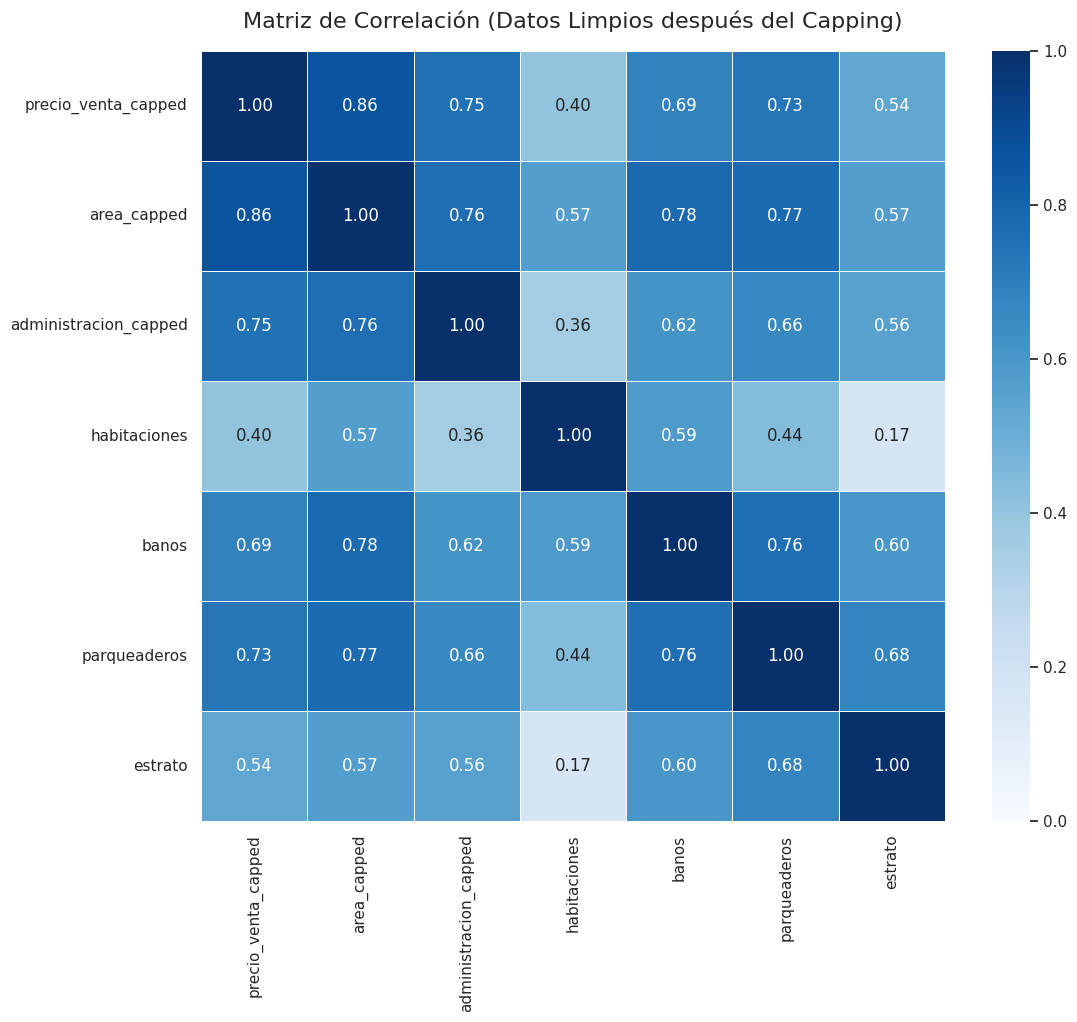

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


columnas_para_correlacion_limpia = [
    'precio_venta_capped',  # Limpia
    'area_capped',          # Limpia
    'administracion_capped',# Limpia
    'habitaciones',         # Original
    'banos',                # Original
    'parqueaderos',         # Original
    'estrato'               # Original
]

# 2. Calculamos la correlación usando el dataframe 'df_limpio'
correlation_limpia = df_limpio[columnas_para_correlacion_limpia].corr()

# 3. Pintamos el Heatmap
plt.figure(figsize=(12, 10))

sns.heatmap(correlation_limpia,
            annot=True,
            cmap='Blues',
            fmt=".2f",
            linewidths=0.5,
            vmin=0, vmax=1) # Fijamos la escala entre 0 y 1 para que los azules se vean bien

plt.title('Matriz de Correlación (Datos Limpios después del Capping)', fontsize=16, y=1.02)
plt.show()

# 4. Selección de variables y visualización de relaciones

En esta sección se seleccionaran las variables que contribuirán como explicativas en el modelo de regresión lineal.



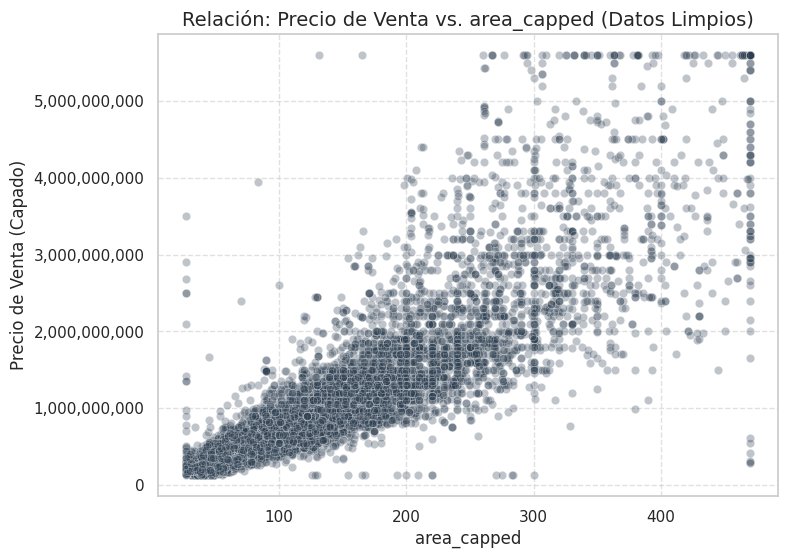

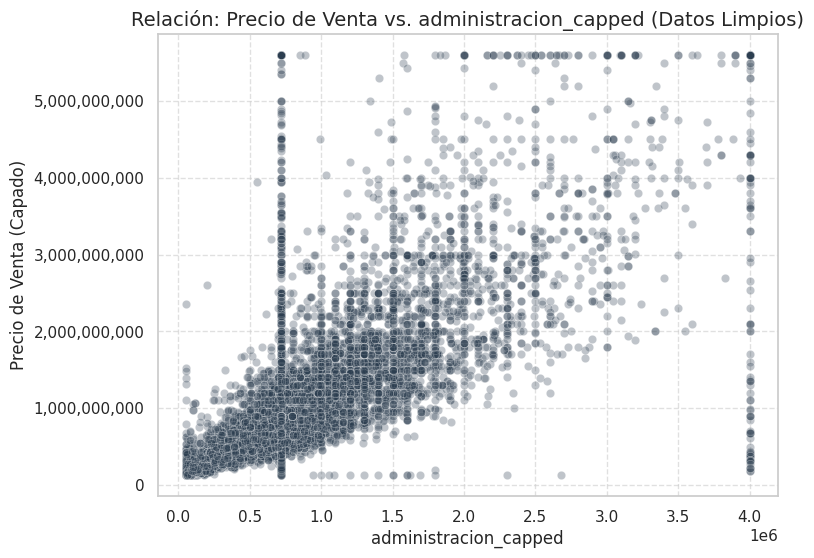

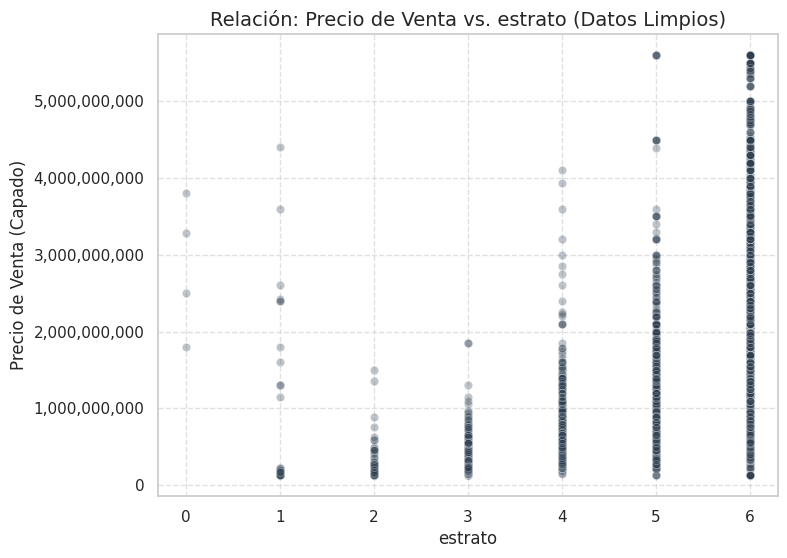

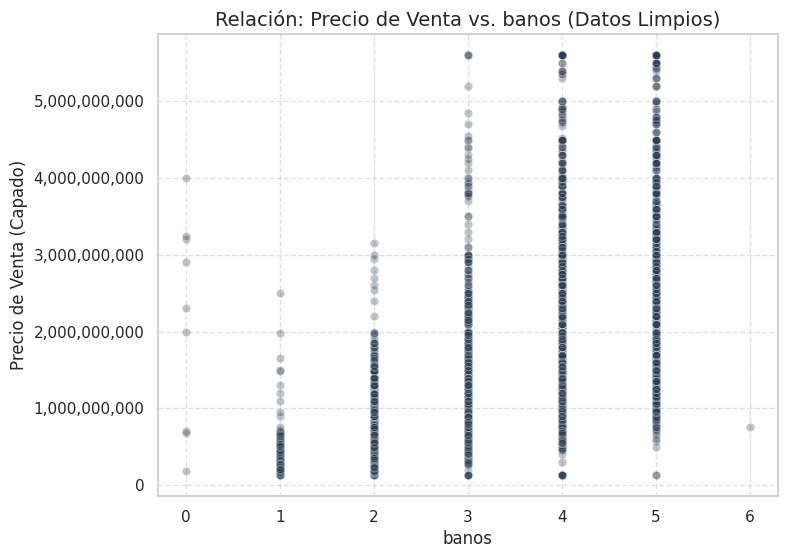

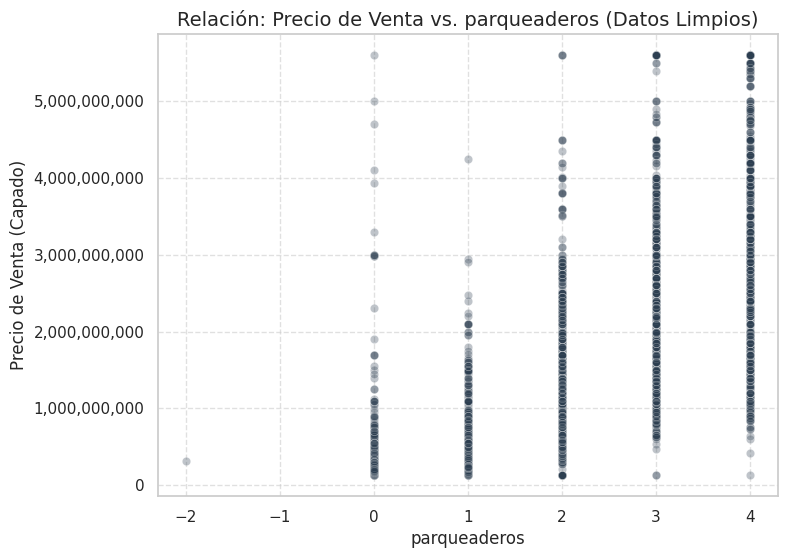

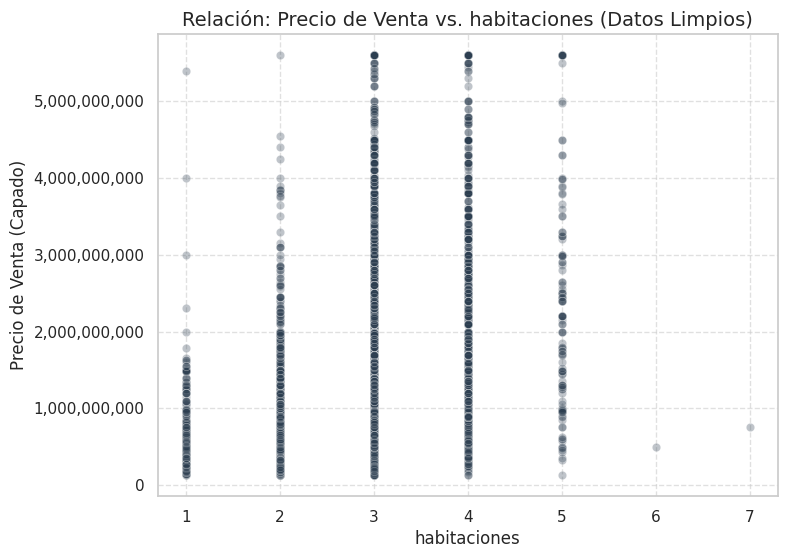

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# 1. Variables explicativas a evaluar.
# Seleccionamos las que mostraron mejor correlación en el heatmap anterior.
variables_evaluar_inmo = [
    'area_capped',
    'administracion_capped',
    'estrato',
    'banos',
    'parqueaderos',
    'habitaciones'

]

# 2. Bucle para generar los Scatterplots
# Nuestra variable dependiente (Eje Y) es 'precio_venta_capped'
for var in variables_evaluar_inmo:
    plt.figure(figsize=(8, 6))

    # alpha=0.3 hace los puntos transparentes.
    # Donde se ve más oscuro es donde hay más apartamentos concentrados.
    sns.scatterplot(x=var, y='precio_venta_capped', data=df_limpio, alpha=0.3, color='#2c3e50')

    plt.title(f'Relación: Precio de Venta vs. {var} (Datos Limpios)', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Precio de Venta (Capado)', fontsize=12)

    ax = plt.gca()
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# 5. Regresión lineal, evaluación y revisión de supuestos

En esta sección se ajustará el modelo de regresión lineal y se evaluará cuantitativamente su desempeño. Posteriormente, se revisarán críticamente los principales supuestos del modelo.

## Ajuste del modelo y evaluación métrica

1. Ajuste el modelo de regresión lineal usando las variables numéricas seleccionadas.
2. Calcule los siguientes indicadores de desempeño:
   - R² (coeficiente de determinación)
   - MAE (error absoluto medio)
   - RMSE (raíz del error cuadrático medio)
3. Interprete el significado de los resultados en el contexto del área quemada.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer # <-- ¡IMPORTANTE! La herramienta de relleno
import numpy as np
import pandas as pd # Necesario para un truquito visual al final

# 1. Definir X e y usando el dataframe LIMPIO
# Asegúrate de que df_limpio existe y tiene las columnas _capped
variables_modelo = ['area_capped', 'administracion_capped', 'banos', 'parqueaderos', 'estrato', 'habitaciones']
X = df_limpio[variables_modelo]
y = df_limpio['precio_venta_capped']

# ---------------------------------------------------------
# PASO DIAGNÓSTICO (Para que veas el problema)
# ---------------------------------------------------------
print("Nulos en las variables X antes de imputar:")
print(X.isnull().sum())
print("-" * 30)

# 2. Separación Train / Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------------------------------------
# ¡LA SOLUCIÓN! IMPUTACIÓN (RELLENO)
# ---------------------------------------------------------
# Creamos un "imputador" que rellenará los huecos con la MEDIANA de cada columna.
# Usamos la mediana porque es resistente a si quedaron valores un poco altos.
imputer = SimpleImputer(strategy='median')

# A. El imputador "aprende" las medianas SOLO de los datos de entrenamiento
# y rellena X_train.
X_train_imputed = imputer.fit_transform(X_train)

# B. El imputador usa lo que aprendió para rellenar X_test (sin mirar los datos del test)
X_test_imputed = imputer.transform(X_test)

# NOTA TÉCNICA: El imputer devuelve "arrays de numpy" (matrices sin nombres de columnas).
# El modelo los entiende bien, así que seguimos adelante.

# 3. Inicializar y entrenar el modelo con los datos RELLENADOS (imputed)
modelo = LinearRegression()
modelo.fit(X_train_imputed, y_train)

# 4. Realizar predicciones sobre los datos de PRUEBA RELLENADOS
y_pred = modelo.predict(X_test_imputed)

# 5. Calcular métricas
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# 6. Imprimir resultados
print("\n--- Desempeño del Modelo en Datos de Prueba (Test) ---")
print(f'R² (Qué tanto explica el modelo): {r2:.4f}')
print(f'MAE (Error promedio en pesos): ${mae:,.0f}')
print(f'RMSE (Error cuadrático en pesos): ${rmse:,.0f}')

# --- BONUS: Ver los coeficientes (Qué variable pesa más) ---
# Creamos un dataframe rápido para ver qué aprendió el modelo
coeficientes = pd.DataFrame({'Variable': variables_modelo, 'Peso (Coeficiente)': modelo.coef_})
print("\n--- Peso de cada variable en el precio ---")
print(coeficientes.sort_values(by='Peso (Coeficiente)', ascending=False))

Nulos en las variables X antes de imputar:
area_capped              0
administracion_capped    0
banos                    0
parqueaderos             0
estrato                  1
habitaciones             0
dtype: int64
------------------------------

--- Desempeño del Modelo en Datos de Prueba (Test) ---
R² (Qué tanto explica el modelo): 0.7770
MAE (Error promedio en pesos): $294,533,754
RMSE (Error cuadrático en pesos): $493,726,359

--- Peso de cada variable en el precio ---
                Variable  Peso (Coeficiente)
3           parqueaderos        1.309684e+08
2                  banos        2.518541e+07
0            area_capped        7.847819e+06
1  administracion_capped        2.471823e+02
4                estrato       -4.622340e+07
5           habitaciones       -1.810890e+08


## Comparación visual de valores reales y predichos

A continuación, compare la distribución de los valores de área real contra los valores predichos por el modelo mediante boxplots.

/tmp/ipython-input-522515305.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Tipo', y='Precio', data=data_long, palette='Set1')


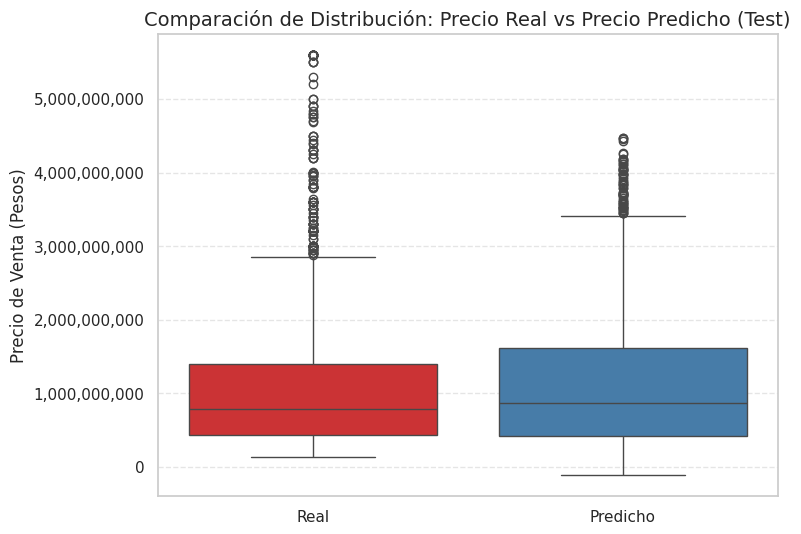

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mtick # Importamos esto para formatear los billones en el eje Y

# --- ADAPTACIÓN AL PROYECTO INMOBILIARIO ---
# Usamos y_test (valores reales del set de prueba) y y_pred (tus predicciones)

datos_comparacion = pd.DataFrame({
    'Real': y_test,
    'Predicho': y_pred
})

# Derretimos el dataframe para que Seaborn lo pueda graficar fácil
data_long = pd.melt(datos_comparacion, var_name='Tipo', value_name='Precio')

plt.figure(figsize=(8, 6))

# Creamos el boxplot comparativo
ax = sns.boxplot(x='Tipo', y='Precio', data=data_long, palette='Set1')

# Ajustamos títulos y etiquetas al contexto inmobiliario
plt.title('Comparación de Distribución: Precio Real vs Precio Predicho (Test)', fontsize=14)
plt.ylabel('Precio de Venta (Pesos)', fontsize=12)
plt.xlabel(None) # Quitamos la etiqueta del eje X que sobra

# --- Formateo del Eje Y para leer los millones/billones ---
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.grid(True, linestyle='--', alpha=0.5, axis='y')

plt.show()

## Boxplot de los errores absolutos frente a medidas de tendencia de área_capped

Observe cómo se comparan los errores absolutos del modelo frente a la media, mediana y desviación estándar de la variable objetivo.

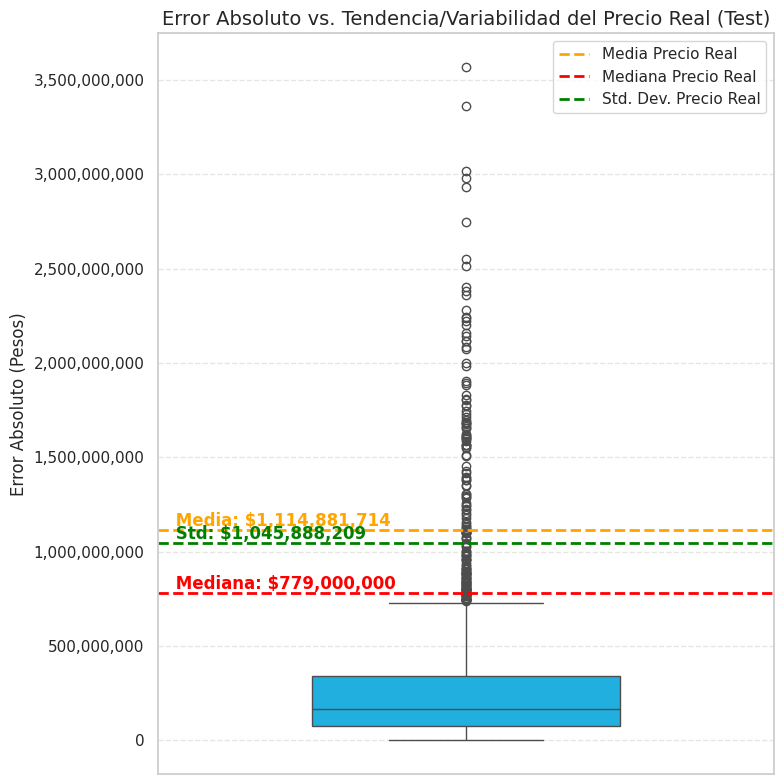

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# --- ADAPTACIÓN AL CONTEXTO INMOBILIARIO ---

# 1. Calcular los errores absolutos usando los datos de prueba (test)
# y_test son los precios reales, y_pred son tus predicciones
errores_absolutos = np.abs(y_test - y_pred)

# 2. Calcular estadísticas centrales del precio real (y_test)
media_precio = y_test.mean()
mediana_precio = y_test.median()
std_precio = y_test.std()

# 3. Crear el gráfico
plt.figure(figsize=(8, 8)) # Un poco más ancho para leer los números grandes
ax = sns.boxplot(y=errores_absolutos, color='deepskyblue', width=0.5)

plt.title('Error Absoluto vs. Tendencia/Variabilidad del Precio Real (Test)', fontsize=14)
plt.ylabel('Error Absoluto (Pesos)', fontsize=12)

# --- Formato de Pesos en el Eje Y ---
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# --- Líneas de Referencia y Textos ---
# Usamos transform=ax.get_yaxis_transform() para ubicar el texto en X relativo al ancho del gráfico (0.02 = un poquito a la derecha del eje)

# Media
plt.axhline(media_precio, color='orange', linestyle='--', linewidth=2, label='Media Precio Real')
plt.text(0.02, media_precio, f" Media: ${media_precio:,.0f}", color='orange', va='bottom', fontweight='bold', transform=ax.get_yaxis_transform())

# Mediana
plt.axhline(mediana_precio, color='red', linestyle='--', linewidth=2, label='Mediana Precio Real')
plt.text(0.02, mediana_precio, f" Mediana: ${mediana_precio:,.0f}", color='red', va='bottom', fontweight='bold', transform=ax.get_yaxis_transform())

# Desviación Estándar
plt.axhline(std_precio, color='green', linestyle='--', linewidth=2, label='Std. Dev. Precio Real')
plt.text(0.02, std_precio, f" Std: ${std_precio:,.0f}", color='green', va='bottom', fontweight='bold', transform=ax.get_yaxis_transform())

# Ajustes finales
plt.legend(loc='upper right')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



---

## Revisión gráfica y estadística de los supuestos del modelo

4. Análisis visual y pruebas:
   - Gráfico de residuos vs valores predichos (linealidad y homocedasticidad)
   - Histograma y Q-Q plot de los residuos (normalidad)
   - Test de Shapiro-Wilk para normalidad de residuos

--- INICIO DEL ANÁLISIS DE DIAGNÓSTICO DE RESIDUOS ---


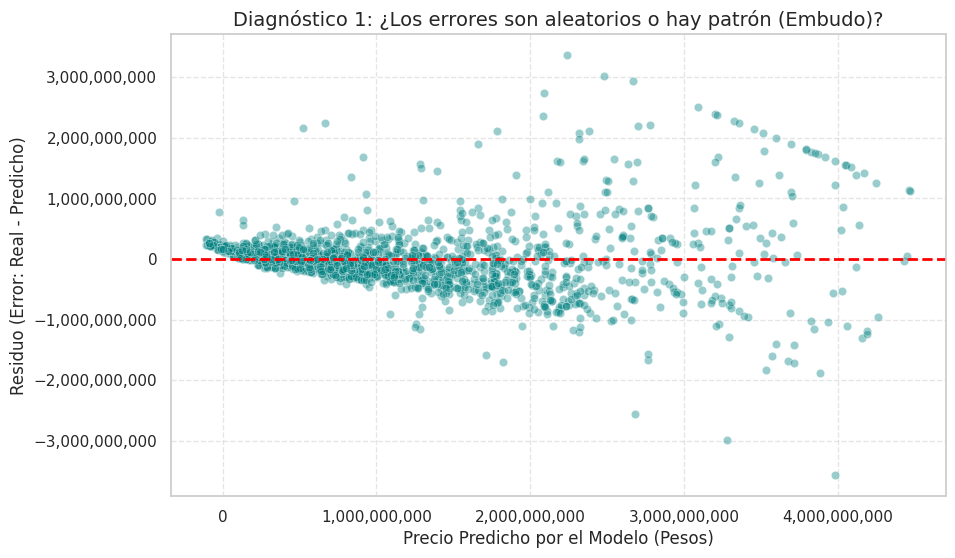

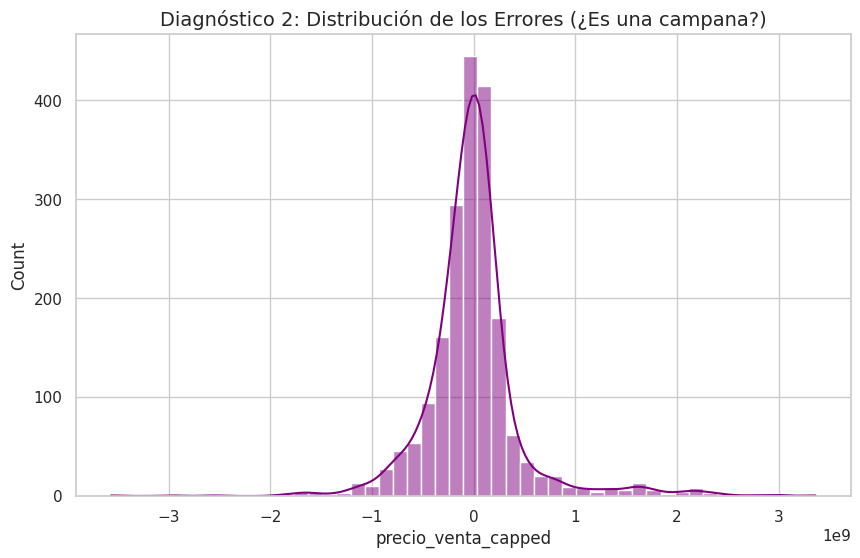

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.ticker as mtick

# Configuración de estilo
sns.set_theme(style="whitegrid")

# --- PASO 0: Calcular los Residuos ---
# Es la diferencia: Precio Real (Test) - Precio que dijo el modelo
# Asegúrate de que y_test y y_pred existen del paso anterior
residuos = y_test - y_pred

print("--- INICIO DEL ANÁLISIS DE DIAGNÓSTICO DE RESIDUOS ---")

# =========================================
# GRÁFICO 1: Residuos vs. Valores Predichos (Heterocedasticidad)
# =========================================
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuos, alpha=0.4, color='teal', ax=ax)
plt.axhline(0, color="red", linestyle="--", linewidth=2) # La línea del cero

plt.xlabel("Precio Predicho por el Modelo (Pesos)", fontsize=12)
plt.ylabel("Residuo (Error: Real - Predicho)", fontsize=12)
plt.title("Diagnóstico 1: ¿Los errores son aleatorios o hay patrón (Embudo)?", fontsize=14)

# Formato de pesos con comas para leer fácil los billones
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# =========================================
# GRÁFICO 2: Histograma de Residuos (Normalidad)
# =========================================
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='purple', bins=50, ax=ax)

plt.title("Diagnóstico 2: Distribución de los Errores (¿Es una campana?)", fontsize=14)

# --- EL ARREGLO DEL EJE X (Formato Millones) ---
# Función para convertir a Millones (M)
def millones_fmt(x, pos):
    return f'${x/1_000_000:,.0f} M'

# Aplicamos el formato al

# 6. Modelos avanzados: Regresión polinomial, logarítmica, Ridge y Lasso



## Regresión polinomial (grado 2) y regresión logarítmica


In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np

# 1. Definir datos
variables_modelo = ['area_capped', 'administracion_capped', 'banos', 'parqueaderos', 'estrato', 'habitaciones']
X = df_limpio[variables_modelo]
y = df_limpio['precio_venta_capped']

# 2. Separar Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Imputación (Obligatorio por el nulo en estrato)
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# 4. Transformación Polinomial (Grado 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_imputed)
X_test_poly = poly.transform(X_test_imputed)

# 5. Entrenar modelo
modelo_poly = LinearRegression()
modelo_poly.fit(X_train_poly, y_train)

# 6. Predecir en Test
y_pred_poly = modelo_poly.predict(X_test_poly)

# 7. Métricas
r2_poly = r2_score(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)

print("=== Regresión Polinomial (Grado 2) en Datos de Prueba ===")
print(f"R²: {r2_poly:.4f}")
print(f"MAE: ${mae_poly:,.0f}")
print(f"RMSE: ${rmse_poly:,.0f}")

=== Regresión Polinomial (Grado 2) en Datos de Prueba ===
R²: 0.8031
MAE: $257,898,334
RMSE: $463,972,635


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np

# --- PREPARACIÓN (Ya conocida) ---
# 1. Definir datos
variables_modelo = ['area_capped', 'administracion_capped', 'banos', 'parqueaderos', 'estrato', 'habitaciones']
X = df_limpio[variables_modelo]
y = df_limpio['precio_venta_capped']

# 2. Separar Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Imputación (Rellenar nulos en X)
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


# A. Transformar el objetivo (y_train) usando logaritmo natural
# Usamos np.log1p que equivale a log(valor + 1) para evitar errores si hubiera ceros.
y_train_log = np.log1p(y_train)

# B. Entrenar el modelo (El modelo aprende a predecir LOGARITMOS, no pesos)
modelo_log = LinearRegression()
modelo_log.fit(X_train_imputed, y_train_log)

# C. Predecir en Test (El resultado estará en escala logarítmica)
y_pred_log = modelo_log.predict(X_test_imputed)

# D. Invertir la transformación (Volver de logaritmos a Pesos reales)
# Usamos np.expm1 que es el inverso de log1p (exp(valor) - 1)
y_pred_pesos = np.expm1(y_pred_log)

# --- EVALUACIÓN ---
# Comparamos los pesos reales (y_test) contra los pesos predichos (y_pred_pesos)
r2_log = r2_score(y_test, y_pred_pesos)
mae_log = mean_absolute_error(y_test, y_pred_pesos)
mse_log = mean_squared_error(y_test, y_pred_pesos)
rmse_log = np.sqrt(mse_log)

print("=== Regresión Lineal con Variable Objetivo Logarítmica (Precio) ===")
print(f"R²: {r2_log:.4f}")
print(f"MAE: ${mae_log:,.0f}")
print(f"RMSE: ${rmse_log:,.0f}")

=== Regresión Lineal con Variable Objetivo Logarítmica (Precio) ===
R²: 0.7682
MAE: $266,384,491
RMSE: $503,459,709


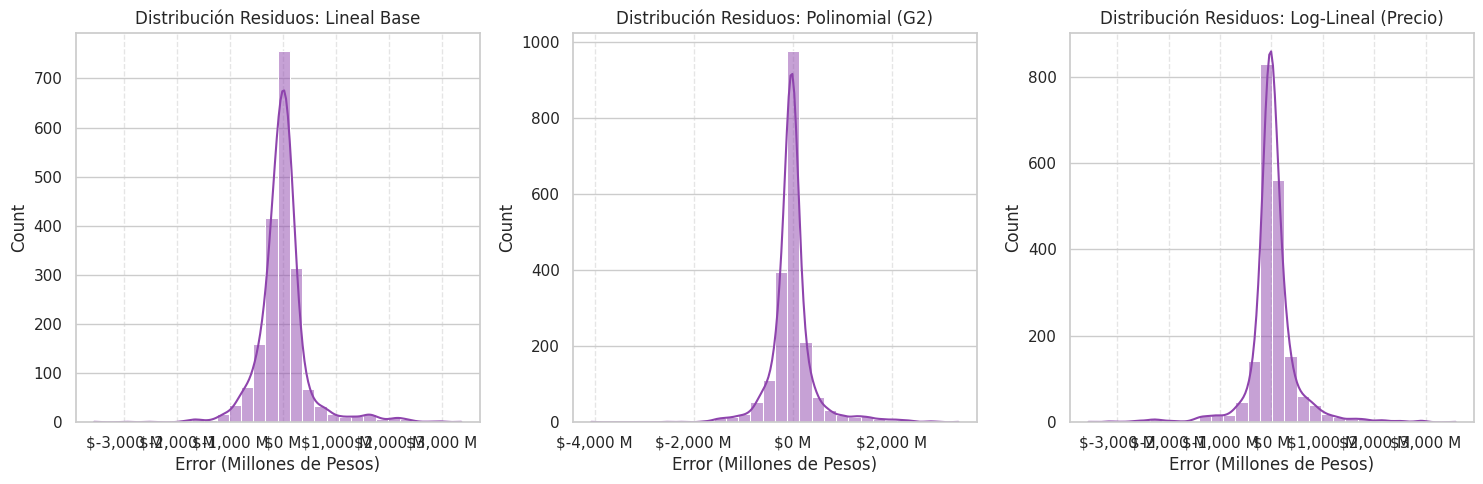

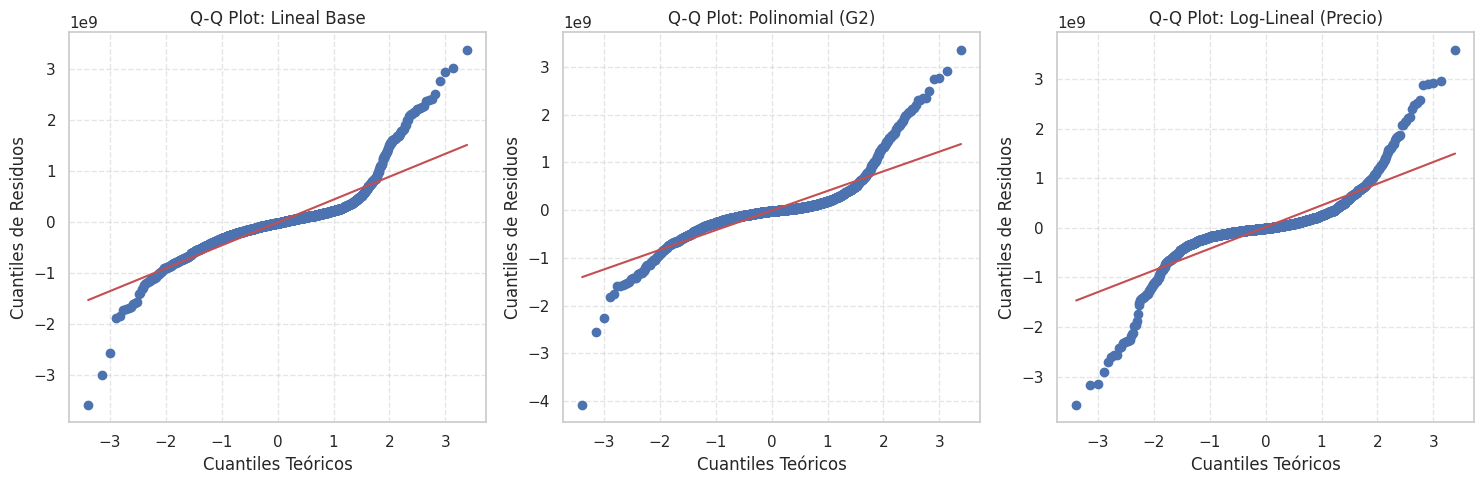

In [24]:
# ---- Comparación de residuos de los tres modelos ----
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.ticker as mtick

residuos_lineal = y_test - y_pred
residuos_poly = y_test - y_pred_poly
residuos_log = y_test - y_pred_pesos

def millones_fmt(x, pos):
    return f'${x/1_000_000:,.0f} M'

plt.figure(figsize=(15, 5))
modelos = ['Lineal Base', 'Polinomial (G2)', 'Log-Lineal (Precio)']
lista_residuos = [residuos_lineal, residuos_poly, residuos_log]

for i, (res, modelo) in enumerate(zip(lista_residuos, modelos)):
    ax = plt.subplot(1, 3, i+1)
    sns.histplot(res, bins=30, kde=True, color='#8e44ad', ax=ax)
    plt.title(f'Distribución Residuos: {modelo}', fontsize=12)
    plt.xlabel('Error (Millones de Pesos)')
    ax.xaxis.set_major_formatter(mtick.FuncFormatter(millones_fmt))
    plt.grid(True, axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
for i, (res, modelo) in enumerate(zip(lista_residuos, modelos)):
    ax = plt.subplot(1, 3, i+1)
    stats.probplot(res, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot: {modelo}', fontsize=12)
    plt.xlabel('Cuantiles Teóricos')
    plt.ylabel('Cuantiles de Residuos')
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## Regresión Ridge y Lasso (regularización)
Exploremos cómo los modelos regularizados afectan el ajuste y los coeficientes:

In [25]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

print("--- INICIO COMPARATIVA: LINEAL vs RIDGE vs LASSO (En Datos de Prueba) ---")

# variables_modelo = ['area_capped', 'administracion_capped', 'banos', 'parqueaderos', 'estrato', 'habitaciones']
# X_train, X_test, y_train, y_test ya deben existir.

# =========================================
# PASO 1: PREPROCESAMIENTO (Imputación + Escalado)
# =========================================
# A. Imputación (Rellenar nulos)
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# B. Escalado (StandardScaler)
scaler = StandardScaler()
# Ajustamos el escalador SOLO con datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train_imputed)
# Transformamos los datos de prueba con la escala aprendida
X_test_scaled = scaler.transform(X_test_imputed)


# =========================================
# PASO 2: ENTRENAMIENTO DE MODELOS
# =========================================

# Modelo Lineal Simple (Base) - Entrenado con datos escalados para comparar igual
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

# Modelo Ridge (L2) - alpha=1.0 es el castigo estándar
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

# Modelo Lasso (L1) - alpha controla qué tantas variables elimina
lasso = Lasso(alpha=1000000, max_iter=10000, tol=0.1, random_state=42)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)


# =========================================
# PASO 3: EVALUACIÓN Y COMPARATIVA
# =========================================

def obtener_metricas(y_true, y_pred):
    return {
        "R2": r2_score(y_true, y_pred),
        "MAE ($)": mean_absolute_error(y_true, y_pred),
        "RMSE ($)": np.sqrt(mean_squared_error(y_true, y_pred))
    }

# Calculamos métricas sobre el TEST set
m_lin = obtener_metricas(y_test, y_pred_lin)
m_ridge = obtener_metricas(y_test, y_pred_ridge)
m_lasso = obtener_metricas(y_test, y_pred_lasso)

# Creamos la tabla comparativa
comparativo = pd.DataFrame({
    "Lineal Simple": m_lin,
    "Ridge (L2)": m_ridge,
    "Lasso (L1)": m_lasso
})

# Formato para leer fácil los millones
pd.options.display.float_format = '{:,.2f}'.format

print("\n=== Resumen Comparativo de Métricas (Datos de Prueba) ===")
display(comparativo.T) # Transponemos (.T) para leerlo mejor


# =========================================
# PASO 4: ANÁLISIS DE COEFICIENTES (¿Qué variables mató Lasso?)
# =========================================
print("\n=== Comparación de Coeficientes (Importancia de Variables Escalas) ===")
coefs_df = pd.DataFrame({
    'Variable': variables_modelo,
    'Lineal': lin_reg.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_
})
display(coefs_df.set_index('Variable'))

print("\nNOTA SOBRE LASSO: Si ves coeficientes en 0.00, es que Lasso eliminó esa variable.")

--- INICIO COMPARATIVA: LINEAL vs RIDGE vs LASSO (En Datos de Prueba) ---

=== Resumen Comparativo de Métricas (Datos de Prueba) ===


,R2,MAE ($),RMSE ($)
Lineal Simple,0.78,"294,533,754.15","493,726,359.32"
Ridge (L2),0.78,"294,522,396.56","493,713,349.24"
Lasso (L1),0.77,"296,692,359.98","497,339,848.66"



=== Comparación de Coeficientes (Importancia de Variables Escalas) ===


,Lineal,Ridge,Lasso
Variable,,,
area_capped,"737,857,948.03","737,467,236.70","800,938,683.08"
administracion_capped,"179,539,533.89","179,648,845.07","179,635,216.30"
banos,"30,233,101.39","30,322,515.32","36,191,936.66"
parqueaderos,"145,092,087.84","145,143,668.69","100,805,771.83"
estrato,"-56,809,294.69","-56,747,327.98","-62,376,180.56"
habitaciones,"-142,858,551.25","-142,740,511.04","-161,224,563.60"



NOTA SOBRE LASSO: Si ves coeficientes en 0.00, es que Lasso eliminó esa variable.


##Random Forest y XGBoost

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Importamos Random Forest
from sklearn.ensemble import RandomForestRegressor

# Importamos XGBoost
import xgboost as xgb

print("--- INICIO FASE 2: MODELOS AVANZADOS (ÁRBOLES) ---")

# =========================================
# PASO 1: PREPARACIÓN DE DATOS (Igual que antes)
# =========================================
variables_modelo = ['area_capped', 'administracion_capped', 'banos', 'parqueaderos', 'estrato', 'habitaciones']
X = df_limpio[variables_modelo]
y = df_limpio['precio_venta_capped']

# Separación Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputación (Rellenar nulos con mediana)
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


# =========================================
# PASO 2: MODELO 1 - RANDOM FOREST (El Robusto)
# =========================================
print("\nEntrenando Random Forest...")
rf_model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)

# Entrenar
rf_model.fit(X_train_imputed, y_train)

# Predecir
y_pred_rf = rf_model.predict(X_test_imputed)
print("¡Random Forest entrenado!")


# =========================================
# PASO 3: MODELO 2 - XGBOOST (El Campeón)
# =========================================
print("\nEntrenando XGBoost...")
# XGBoost tiene muchos hiperparámetros. Estos son valores iniciales sólidos.
# n_estimators=500: Más árboles que RF.
# learning_rate=0.05: Aprende despacio pero seguro (mejor precisión).
xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=7,           # Profundidad de los árboles
    subsample=0.8,         # Usa el 80% de datos para cada árbol (evita overfitting)
    colsample_bytree=0.8,  # Usa el 80% de columnas para cada árbol
    random_state=42,
    n_jobs=-1
)

# Entrenar
xgb_model.fit(X_train_imputed, y_train)

# Predecir
y_pred_xgb = xgb_model.predict(X_test_imputed)
print("¡XGBoost entrenado!")


# =========================================
# PASO 4: COMPARATIVA FINAL
# =========================================

# Función auxiliar para calcular métricas rápido
def get_metrics(y_true, y_pred):
    return {
        "R2": r2_score(y_true, y_pred),
        "MAE ($)": mean_absolute_error(y_true, y_pred),
        "RMSE ($)": np.sqrt(mean_squared_error(y_true, y_pred))
    }

# Calculamos métricas
metrics_rf = get_metrics(y_test, y_pred_rf)
metrics_xgb = get_metrics(y_test, y_pred_xgb)

# Creamos el dataframe comparativo
comparativo_fase2 = pd.DataFrame({
    # "Polinomial (G2)": metrics_poly, # Descomenta si lo usas
    "Random Forest": metrics_rf,
    "XGBoost": metrics_xgb
})

# Formato para leer fácil los millones
pd.options.display.float_format = '{:,.0f}'.format

print("\n=== RESULTADOS FASE 2: COMPARATIVA DE MODELOS AVANZADOS ===")
display(comparativo_fase2.T) # Transponemos para leer mejor

--- INICIO FASE 2: MODELOS AVANZADOS (ÁRBOLES) ---

Entrenando Random Forest...
¡Random Forest entrenado!

Entrenando XGBoost...
¡XGBoost entrenado!

=== RESULTADOS FASE 2: COMPARATIVA DE MODELOS AVANZADOS ===


,R2,MAE ($),RMSE ($)
Random Forest,1,"247,008,730","452,875,573"
XGBoost,1,"246,432,721","453,065,468"


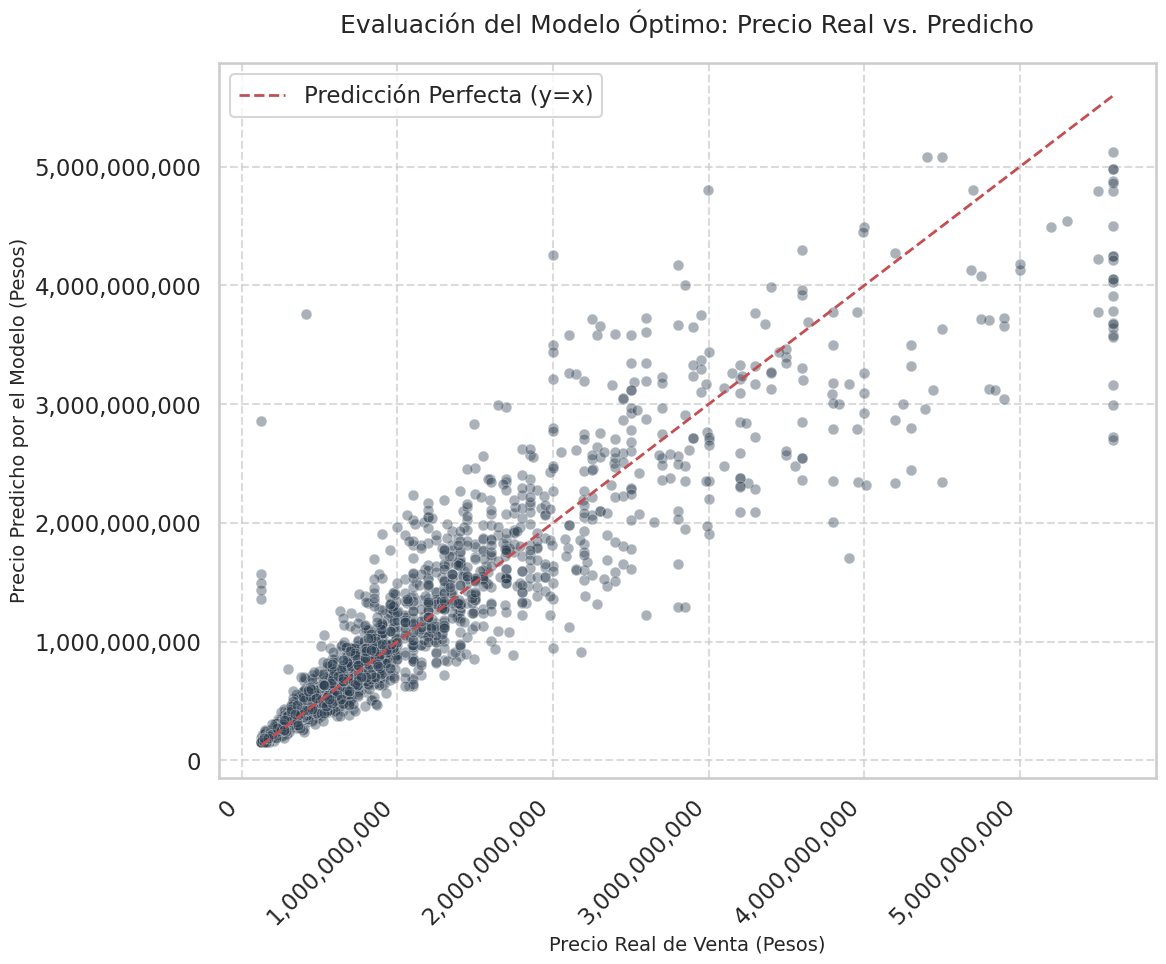

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np



sns.set_theme(style="whitegrid", context="talk")

# Crear la figura
plt.figure(figsize=(12, 10))

# 1. Crear el Scatterplot (Real vs. Predicho)
ax = sns.scatterplot(x=y_test, y=y_pred_best_xgb,
                     color="#2c3e50", alpha=0.4, s=60, edgecolor="w", linewidth=0.5)

# 2. Agregar la "Línea de Perfección" (Diagonal y=x)
min_val = min(np.min(y_test), np.min(y_pred_best_xgb))
max_val = max(np.max(y_test), np.max(y_pred_best_xgb))

# Dibujamos una línea roja punteada que representa la predicción perfecta
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Predicción Perfecta (y=x)')


# 3. Formato Profesional
plt.title('Evaluación del Modelo Óptimo: Precio Real vs. Predicho', fontsize=18, y=1.03)
plt.xlabel('Precio Real de Venta (Pesos)', fontsize=14)
plt.ylabel('Precio Predicho por el Modelo (Pesos)', fontsize=14)

# Formatear los ejes con comas para leer fácilmente los millones/billones
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

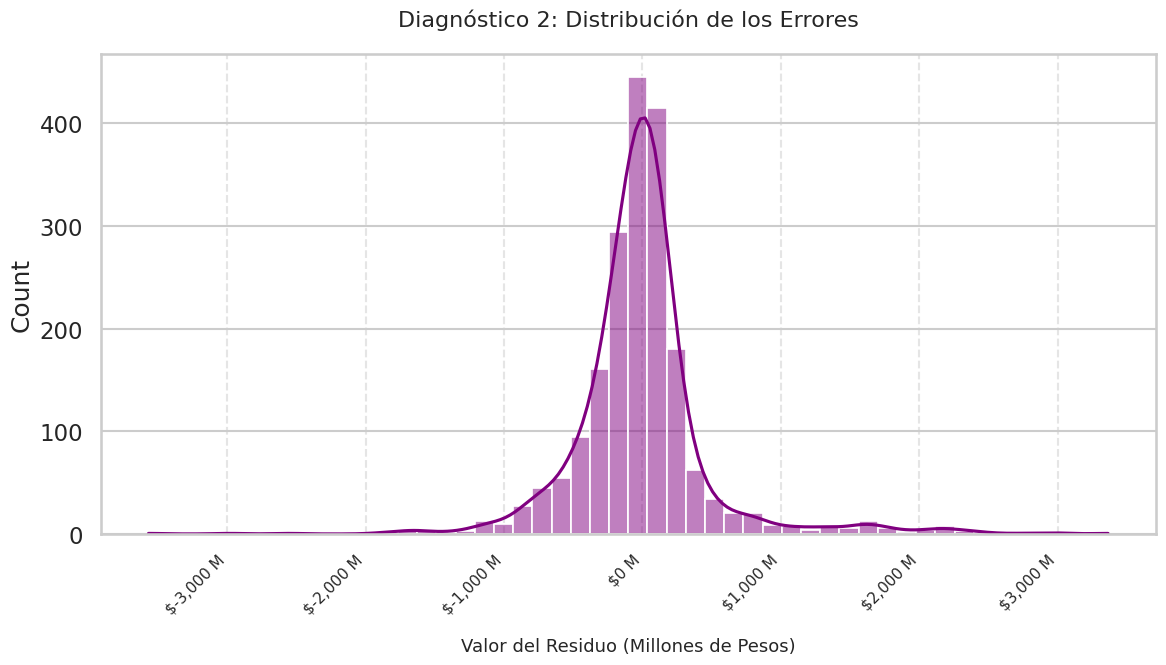

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick


fig, ax = plt.subplots(figsize=(12, 7))

# Creamos el histograma
sns.histplot(residuos, kde=True, color='purple', bins=50, ax=ax)
plt.title("Diagnóstico 2: Distribución de los Errores", fontsize=16, pad=20)

# --- EL ARREGLO DEL EJE X ---
# 1. Función para convertir a Millones (M) y ahorrar espacio
def millones_fmt(x, pos):
    return f'${x/1_000_000:,.0f} M'

# 2. Aplicamos el formato
ax.xaxis.set_major_formatter(mtick.FuncFormatter(millones_fmt))
plt.xticks(rotation=45, ha='right', fontsize=11)

plt.xlabel("Valor del Residuo (Millones de Pesos)", fontsize=13, labelpad=15)
# -------------------------------------------

plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## SHAP

 99%|===================| 1947/1968 [01:45<00:01]       

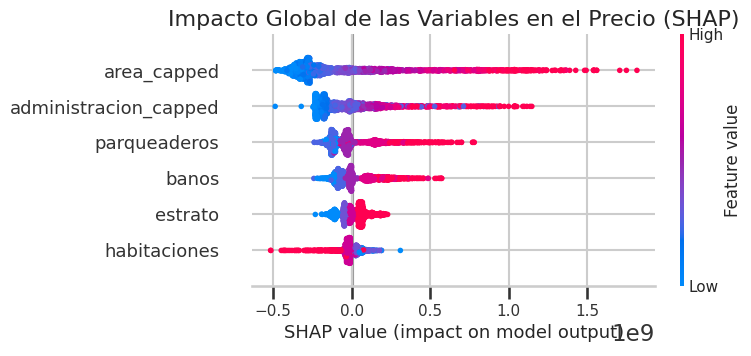

In [50]:
import shap
import matplotlib.pyplot as plt
import pandas as pd


model_to_explain = best_xgb
background_data = X_train_imputed

# 1. Crear el "Explainer"
explainer = shap.TreeExplainer(model_to_explain, data=background_data)

# 2. Calcular los valores SHAP
shap_values = explainer(X_test_imputed)


shap_values.feature_names = list(X_test.columns)

# --- GRÁFICO DE RESUMEN GLOBAL (Summary Plot) ---
plt.figure(figsize=(12, 8))
plt.title("Impacto Global de las Variables en el Precio (SHAP)", fontsize=16)

# Creamos el gráfico de abejas (beeswarm)
shap.plots.beeswarm(shap_values, max_display=10, show=False)

plt.tight_layout()
plt.show()

Analizando Apartamento ID: 8156


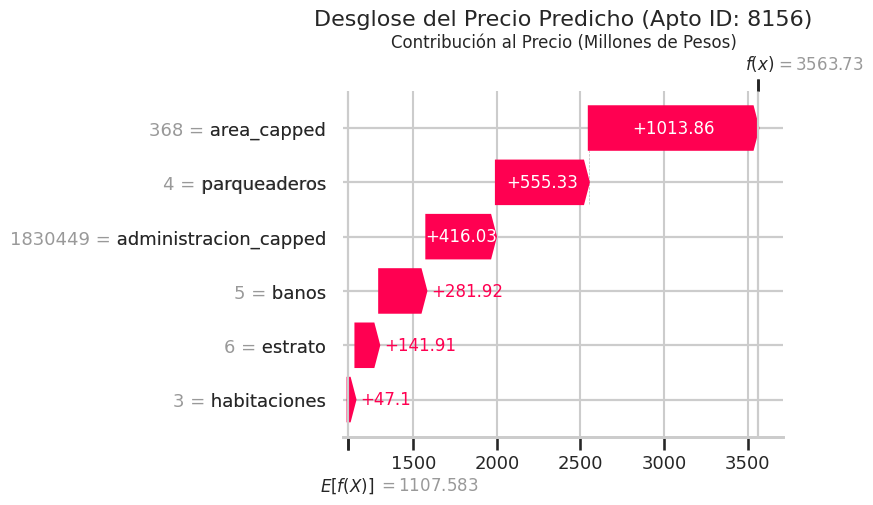

In [51]:
import matplotlib.pyplot as plt
import shap
import copy


print(f"Analizando Apartamento ID: {idx_apartamento}")


# 1. Crear una copia PROFUNDA del objeto shap_values.
shap_values_millones = copy.deepcopy(shap_values)

# 2. Dividir los valores por 1 Millón.
shap_values_millones.base_values /= 1_000_000
shap_values_millones.values /= 1_000_000

shap_values_millones.feature_names = list(X_test.columns)
# ============================================================

plt.figure(figsize=(12, 6))

# Usamos el nuevo objeto shap_values_millones
shap.plots.waterfall(shap_values_millones[posicion_array], max_display=10, show=False)

# Título y Etiqueta del Eje X
plt.title(f"Desglose del Precio Predicho (Apto ID: {idx_apartamento})", fontsize=16)
plt.xlabel("Contribución al Precio (Millones de Pesos)", fontsize=12)

# Ajuste de margen para que los nombres largos quepan
plt.subplots_adjust(left=0.35) # Aumenté un poquito a 0.35 por si acaso

plt.show()